## Data analysis for the bachelor thesis: using the scattering transform for image classification by Marius Hobbhahn (2019)

1. Baseline tests: 3 Datasets(VOC, Kitti, toy_data) with additional parameters Batchnorm, Augmentations, Pretrained. Dependant variable is AP = average precision

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf  

In [12]:
#load and show
baselinedf = pd.read_csv('baselines.csv', delimiter=',')
baselinedf

,VOC,Toy_data,Kitti,Augmentations,Batchnorm,Pretrained,Accuracy
0,1,0,0,1,1,1,0.6250
1,1,0,0,1,1,1,0.6205
2,1,0,0,1,1,1,0.6062
3,1,0,0,1,1,1,0.6164
4,1,0,0,1,1,1,0.6271
5,1,0,0,0,1,1,0.3470
6,1,0,0,0,1,1,0.3411
7,1,0,0,0,1,1,0.3686
8,1,0,0,0,1,1,0.3191
9,1,0,0,0,1,1,0.3287


In [13]:
#data cleaning: throw out the outliers

baseline_df_clean = baselinedf.drop([20, 36, 38, 44, 53, 57])
baseline_df_clean

,VOC,Toy_data,Kitti,Augmentations,Batchnorm,Pretrained,Accuracy
0,1,0,0,1,1,1,0.6250
1,1,0,0,1,1,1,0.6205
2,1,0,0,1,1,1,0.6062
3,1,0,0,1,1,1,0.6164
4,1,0,0,1,1,1,0.6271
5,1,0,0,0,1,1,0.3470
6,1,0,0,0,1,1,0.3411
7,1,0,0,0,1,1,0.3686
8,1,0,0,0,1,1,0.3191
9,1,0,0,0,1,1,0.3287


In [63]:
#fit the model with binomial and logistic link function
baselinefit = sm.formula.glm( formula='Accuracy~VOC + Toy_data + Kitti + Augmentations + Batchnorm + Pretrained', 
                         data=baseline_df_clean, 
                         family=sm.families.Binomial(link=sm.families.links.logit) 
                       ).fit()
print(baselinefit.summary())
print(baselinefit.summary().as_latex())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Accuracy   No. Observations:                   88
Model:                            GLM   Df Residuals:                       82
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.873
Date:                Wed, 12 Jun 2019   Deviance:                       2.4687
Time:                        16:47:27   Pearson chi2:                     2.45
No. Iterations:                     8   Covariance Type:             nonrobust
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2916      0.447     -2.892      0.004      -2.167      -0.416
VOC               0.1038      0.369      0.

In [15]:
#create a table with the respective means and standard deviations for the categories
df = baseline_df_clean
datasets = ['VOC', 'Kitti', 'Toy_data']
augmentations = [0, 1]
batchnorms = [0, 1]
pretrained = [0, 1]
data = []
#df.loc[(df['VOC'] == 1) & (df['Augmentations'] == 1) & (df['Batchnorm'] == 1) & (df['Pretrained'] == 1), 'Accuracy']
for d in datasets:
    for a in augmentations:
        for b in batchnorms:
            for p in pretrained:
                values = df.loc[(df[d] == 1) & (df['Augmentations'] == a) & (df['Batchnorm'] == b) & (df['Pretrained'] == p), 'Accuracy']
                std_dev = np.std(values)
                mean = np.mean(values)
                print("dataset: {} \t augmentation: {} \t batchnorm: {} \t pretrained: {} \t mean: {:.03f} \t std_dev: {:.03f}".format(d,a,b,p, mean, std_dev))
                data.append([d,a,b,p, np.around(mean, 3), np.around(std_dev, 3)])
        
columns = ['Dataset', 'Augmentations', 'Batchnorm', 'Pretrained', 'Mean', 'Std_dev']
final_df = pd.DataFrame(data, columns=columns)
print(final_df.to_latex(index=False))


dataset: VOC 	 augmentation: 0 	 batchnorm: 0 	 pretrained: 0 	 mean: 0.108 	 std_dev: 0.008
dataset: VOC 	 augmentation: 0 	 batchnorm: 0 	 pretrained: 1 	 mean: 0.363 	 std_dev: 0.055
dataset: VOC 	 augmentation: 0 	 batchnorm: 1 	 pretrained: 0 	 mean: 0.329 	 std_dev: 0.041
dataset: VOC 	 augmentation: 0 	 batchnorm: 1 	 pretrained: 1 	 mean: 0.341 	 std_dev: 0.017
dataset: VOC 	 augmentation: 1 	 batchnorm: 0 	 pretrained: 0 	 mean: 0.364 	 std_dev: 0.025
dataset: VOC 	 augmentation: 1 	 batchnorm: 0 	 pretrained: 1 	 mean: 0.630 	 std_dev: 0.003
dataset: VOC 	 augmentation: 1 	 batchnorm: 1 	 pretrained: 0 	 mean: 0.568 	 std_dev: 0.002
dataset: VOC 	 augmentation: 1 	 batchnorm: 1 	 pretrained: 1 	 mean: 0.619 	 std_dev: 0.007
dataset: Kitti 	 augmentation: 0 	 batchnorm: 0 	 pretrained: 0 	 mean: 0.027 	 std_dev: 0.024
dataset: Kitti 	 augmentation: 0 	 batchnorm: 0 	 pretrained: 1 	 mean: 0.032 	 std_dev: 0.009
dataset: Kitti 	 augmentation: 0 	 batchnorm: 1 	 pretrained: 0 	 

# 2. Tests for the invariance datasets

In [34]:
#load and show
invariantdf = pd.read_csv('invariant_data.csv', delimiter=',')
invariantdf

,Deformation_data,Rotation_data,Translation_data,Scale_data,Pretrained,Accuracy
0,1,0,0,0,1,0.9237
1,1,0,0,0,1,0.8462
2,1,0,0,0,1,0.8947
3,1,0,0,0,1,0.9047
4,1,0,0,0,1,0.9088
5,1,0,0,0,0,0.9237
6,1,0,0,0,0,0.9302
7,1,0,0,0,0,0.9267
8,1,0,0,0,0,0.9320
9,1,0,0,0,0,0.9293


In [62]:
#fit the model with binomial and logistic link function
invariantfit = sm.formula.glm( formula='Accuracy~Deformation_data  + Rotation_data + Scale_data + Translation_data + Pretrained', 
                         data=invariantdf, 
                         family=sm.families.Binomial(link=sm.families.links.logit) 
                       ).fit()
print(invariantfit.summary())
print(invariantfit.summary().as_latex())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Accuracy   No. Observations:                   42
Model:                            GLM   Df Residuals:                       37
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.790
Date:                Wed, 12 Jun 2019   Deviance:                     0.086250
Time:                        16:46:44   Pearson chi2:                   0.0930
No. Iterations:                     9   Covariance Type:             nonrobust
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5830      1.724     -0.338      0.735      -3.962       2.796
Deformation_data     2.9682      1

In [21]:
#create a table with the respective means and standard deviations for the categories
df = invariantdf
datasets = ['Deformation_data', 'Rotation_data', 'Translation_data', 'Scale_data']
pretrained = [0, 1]
data = []
#df.loc[(df['VOC'] == 1) & (df['Augmentations'] == 1) & (df['Batchnorm'] == 1) & (df['Pretrained'] == 1), 'Accuracy']
for d in datasets:
    for p in pretrained:
        values = df.loc[(df[d] == 1) & (df['Pretrained'] == p), 'Accuracy']
        std_dev = np.std(values)
        mean = np.mean(values)
        print("dataset: {} \t pretrained: {} \t mean: {:.03f} \t std_dev: {:.03f}".format(d,p, mean, std_dev))
        data.append([d,p, np.around(mean, 3), np.around(std_dev, 3)])

columns = ['Dataset', 'Pretrained', 'Mean', 'Std_dev']
final_df = pd.DataFrame(data, columns=columns)
print(final_df.to_latex(index=False))

dataset: Deformation_data 	 pretrained: 0 	 mean: 0.928 	 std_dev: 0.003
dataset: Deformation_data 	 pretrained: 1 	 mean: 0.896 	 std_dev: 0.026
dataset: Rotation_data 	 pretrained: 0 	 mean: 0.635 	 std_dev: 0.010
dataset: Rotation_data 	 pretrained: 1 	 mean: 0.622 	 std_dev: 0.026
dataset: Translation_data 	 pretrained: 0 	 mean: 0.001 	 std_dev: 0.001
dataset: Translation_data 	 pretrained: 1 	 mean: 0.002 	 std_dev: 0.001
dataset: Scale_data 	 pretrained: 0 	 mean: 0.644 	 std_dev: 0.006
dataset: Scale_data 	 pretrained: 1 	 mean: 0.637 	 std_dev: 0.004
\begin{tabular}{lrrr}
\toprule
          Dataset &  Pretrained &   Mean &  Std\_dev \\
\midrule
 Deformation\_data &           0 &  0.928 &    0.003 \\
 Deformation\_data &           1 &  0.896 &    0.026 \\
    Rotation\_data &           0 &  0.635 &    0.010 \\
    Rotation\_data &           1 &  0.622 &    0.026 \\
 Translation\_data &           0 &  0.001 &    0.001 \\
 Translation\_data &           1 &  0.002 &    0.001 \\
  

# 3 sequential scattering

In [66]:
#load and show
sequentialdf = pd.read_csv('scattering_sequential.csv', delimiter=',')
sequentialdf

,VOC,Kitti,Toy_data,Scale_data,Rotation_data,Deformation_data,Translation_data,Pretrained,Accuracy
0,1,0,0,0,0,0,0,1,0.4692
1,1,0,0,0,0,0,0,1,0.3940
2,1,0,0,0,0,0,0,0,0.3952
3,1,0,0,0,0,0,0,0,0.4034
4,0,1,0,0,0,0,0,1,0.0750
5,0,1,0,0,0,0,0,1,0.0815
6,0,1,0,0,0,0,0,1,0.0756
7,0,1,0,0,0,0,0,0,0.1110
8,0,1,0,0,0,0,0,0,0.1100
9,0,1,0,0,0,0,0,0,0.1082


In [68]:
#fit the model with binomial and logistic link function
sequentialfit = sm.formula.glm( formula='Accuracy~VOC + Kitti + Toy_data + Deformation_data  + Rotation_data + Scale_data + Translation_data + Pretrained', 
                         data=sequentialdf, 
                         family=sm.families.Binomial(link=sm.families.links.logit) 
                       ).fit()
print(sequentialfit.summary())
print(sequentialfit.summary().as_latex())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Accuracy   No. Observations:                   40
Model:                            GLM   Df Residuals:                       32
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.468
Date:                Fri, 14 Jun 2019   Deviance:                      0.45398
Time:                        16:16:06   Pearson chi2:                    0.504
No. Iterations:                     6   Covariance Type:             nonrobust
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5339      0.515      1.037      0.300      -0.475       1.543
VOC                 -0.8504      0

In [69]:
#create a table with the respective means and standard deviations for the categories
df = sequentialdf
datasets = ['VOC', 'Kitti', 'Toy_data', 'Deformation_data', 'Rotation_data', 'Translation_data', 'Scale_data']
pretrained = [0, 1]
data = []
#df.loc[(df['VOC'] == 1) & (df['Augmentations'] == 1) & (df['Batchnorm'] == 1) & (df['Pretrained'] == 1), 'Accuracy']
for d in datasets:
    for p in pretrained:
        values = df.loc[(df[d] == 1) & (df['Pretrained'] == p), 'Accuracy']
        std_dev = np.std(values)
        mean = np.mean(values)
        print("dataset: {} \t pretrained: {} \t mean: {:.03f} \t std_dev: {:.03f}".format(d,p, mean, std_dev))
        data.append([d,p, np.around(mean, 3), np.around(std_dev, 3)])

columns = ['Dataset', 'Pretrained', 'Mean', 'Std_dev']
final_df = pd.DataFrame(data, columns=columns)
print(final_df.to_latex(index=False))

dataset: VOC 	 pretrained: 0 	 mean: 0.399 	 std_dev: 0.004
dataset: VOC 	 pretrained: 1 	 mean: 0.432 	 std_dev: 0.038
dataset: Kitti 	 pretrained: 0 	 mean: 0.110 	 std_dev: 0.001
dataset: Kitti 	 pretrained: 1 	 mean: 0.077 	 std_dev: 0.003
dataset: Toy_data 	 pretrained: 0 	 mean: 0.831 	 std_dev: 0.000
dataset: Toy_data 	 pretrained: 1 	 mean: 0.818 	 std_dev: 0.001
dataset: Deformation_data 	 pretrained: 0 	 mean: 0.933 	 std_dev: 0.001
dataset: Deformation_data 	 pretrained: 1 	 mean: 0.929 	 std_dev: 0.001
dataset: Rotation_data 	 pretrained: 0 	 mean: 0.590 	 std_dev: 0.014
dataset: Rotation_data 	 pretrained: 1 	 mean: 0.659 	 std_dev: 0.059
dataset: Translation_data 	 pretrained: 0 	 mean: 0.857 	 std_dev: 0.000
dataset: Translation_data 	 pretrained: 1 	 mean: 0.767 	 std_dev: 0.127
dataset: Scale_data 	 pretrained: 0 	 mean: 0.646 	 std_dev: 0.000
dataset: Scale_data 	 pretrained: 1 	 mean: 0.641 	 std_dev: 0.003
\begin{tabular}{lrrr}
\toprule
          Dataset &  Pretrain

# 4 parallel scattering

In [93]:
#load and show
paralleldf = pd.read_csv('scattering_parallel.csv', delimiter=',')
paralleldf

,VOC,Kitti,Toy_data,Deformation_data,Rotation_data,Translation_data,Scale_data,Pretrained,Accuracy
0,1,0,0,0,0,0,0,1,0.4760
1,1,0,0,0,0,0,0,0,0.1456
2,0,1,0,0,0,0,0,1,0.1048
3,0,1,0,0,0,0,0,0,0.0415
4,0,0,1,0,0,0,0,1,0.8037
5,0,0,1,0,0,0,0,0,0.7449
6,0,0,0,1,0,0,0,1,0.9117
7,0,0,0,1,0,0,0,0,0.8997
8,0,0,0,0,1,0,0,1,0.6133
9,0,0,0,0,1,0,0,0,0.6766


In [96]:
#fit the model with binomial and logistic link function
parallelfit = sm.formula.glm( formula='Accuracy~VOC + Kitti + Toy_data + Deformation_data  + Rotation_data + Scale_data + Translation_data + Pretrained', 
                         data=paralleldf, 
                         family=sm.families.Binomial(link=sm.families.links.logit) 
                       ).fit()
print(parallelfit.summary())
print(parallelfit.summary().as_latex())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Accuracy   No. Observations:                   23
Model:                            GLM   Df Residuals:                       15
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.0343
Date:                Mon, 17 Jun 2019   Deviance:                      0.30082
Time:                        18:08:03   Pearson chi2:                    0.291
No. Iterations:                     5   Covariance Type:             nonrobust
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2852      0.715      0.399      0.690      -1.116       1.686
VOC                 -1.1895      1

In [97]:
#create a table with the respective means and standard deviations for the categories
df = paralleldf
datasets = ['VOC', 'Kitti', 'Toy_data', 'Deformation_data', 'Rotation_data', 'Translation_data', 'Scale_data']
pretrained = [0, 1]
data = []
#df.loc[(df['VOC'] == 1) & (df['Augmentations'] == 1) & (df['Batchnorm'] == 1) & (df['Pretrained'] == 1), 'Accuracy']
for d in datasets:
    for p in pretrained:
        values = df.loc[(df[d] == 1) & (df['Pretrained'] == p), 'Accuracy']
        std_dev = np.std(values)
        mean = np.mean(values)
        print("dataset: {} \t pretrained: {} \t mean: {:.03f} \t std_dev: {:.03f}".format(d,p, mean, std_dev))
        data.append([d,p, np.around(mean, 3), np.around(std_dev, 3)])

columns = ['Dataset', 'Pretrained', 'Mean', 'Std_dev']
final_df = pd.DataFrame(data, columns=columns)
print(final_df.to_latex(index=False))

dataset: VOC 	 pretrained: 0 	 mean: 0.146 	 std_dev: 0.000
dataset: VOC 	 pretrained: 1 	 mean: 0.476 	 std_dev: 0.000
dataset: Kitti 	 pretrained: 0 	 mean: 0.042 	 std_dev: 0.000
dataset: Kitti 	 pretrained: 1 	 mean: 0.105 	 std_dev: 0.000
dataset: Toy_data 	 pretrained: 0 	 mean: 0.739 	 std_dev: 0.006
dataset: Toy_data 	 pretrained: 1 	 mean: 0.803 	 std_dev: 0.000
dataset: Deformation_data 	 pretrained: 0 	 mean: 0.900 	 std_dev: 0.000
dataset: Deformation_data 	 pretrained: 1 	 mean: 0.912 	 std_dev: 0.000
dataset: Rotation_data 	 pretrained: 0 	 mean: 0.684 	 std_dev: 0.007
dataset: Rotation_data 	 pretrained: 1 	 mean: 0.612 	 std_dev: 0.002
dataset: Translation_data 	 pretrained: 0 	 mean: 0.842 	 std_dev: 0.000
dataset: Translation_data 	 pretrained: 1 	 mean: 0.848 	 std_dev: 0.002
dataset: Scale_data 	 pretrained: 0 	 mean: 0.641 	 std_dev: 0.001
dataset: Scale_data 	 pretrained: 1 	 mean: 0.640 	 std_dev: 0.001
\begin{tabular}{lrrr}
\toprule
          Dataset &  Pretrain

# Comparisons

In [98]:
#load and show
comparisondf = pd.read_csv('comparison.csv', delimiter=',')
comparisondf

,Kitti,VOC,Toy_data,Deformation_data,Rotation_data,Translation_data,Scale_data
0,0.1250,0.630,0.792,0.928,0.635,0.002,0.644
1,0.1100,0.432,0.831,0.933,0.659,0.857,0.646
2,0.1048,0.476,0.803,0.912,0.684,0.848,0.640


In [99]:
#fancy table
comparisondf.rename(index={0:'Standard SSD',1:'Sequential Scattering', 2:'Parallel Scattering'}, inplace=True)
comparisondfT = comparisondf.T
print(comparisondfT.to_latex(index=True))

\begin{tabular}{lrrr}
\toprule
{} &  Standard SSD &  Sequential Scattering &  Parallel Scattering \\
\midrule
Kitti            &         0.125 &                  0.110 &               0.1048 \\
VOC              &         0.630 &                  0.432 &               0.4760 \\
Toy\_data         &         0.792 &                  0.831 &               0.8030 \\
Deformation\_data &         0.928 &                  0.933 &               0.9120 \\
Rotation\_data    &         0.635 &                  0.659 &               0.6840 \\
Translation\_data &         0.002 &                  0.857 &               0.8480 \\
Scale\_data       &         0.644 &                  0.646 &               0.6400 \\
\bottomrule
\end{tabular}



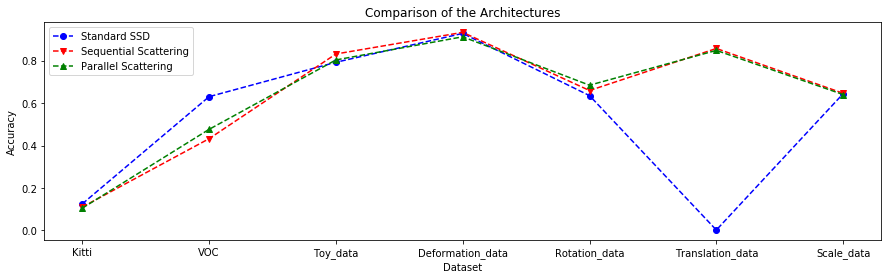

In [100]:
# fancy plot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,4)
plt.plot(comparisondf.loc['Standard SSD'], linestyle='--', marker='o', color="blue", label="Standard SSD")
plt.plot(comparisondf.loc['Sequential Scattering'], linestyle='--', marker='v', color="red", label="Sequential Scattering")
plt.plot(comparisondf.loc['Parallel Scattering'], linestyle='--', marker='^', color="green", label="Parallel Scattering")
plt.legend()
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of the Architectures')
plt.savefig('comparison.png')
plt.show()

# Timing experiments

In [29]:
#TIMINGS:

scattering_parallel = [1.4894, 1.4930, 1.4955, 1.4959, 1.4999, 1.4968, 1.5008, 1.4978, 1.4987, 1.4994, 
                       1.4981, 1.4968, 1.4971, 1.4998, 1.4970, 1.4986, 1.5014, 1.4976, 1.4985, 1.4984,
                       1.4964, 1.4981, 1.4962, 1.5008, 1.4969, 1.5001, 1.4992, 1.4984, 1.4989, 1.5001,
                       1.4980, 1.5013, 1.4993, 1.5012, 1.4980, 1.4980, 1.5017, 1.4977, 1.5017, 1.4978,
                       1.4978, 1.5020, 1.4967, 1.4982, 1.4986, 1.4984, 1.4991, 1.4989, 1.4994, 1.5000, 
                       1.5002, 1.4986, 1.4983, 1.4988, 1.4998, 1.4976, 1.4969, 1.5012, 1.4995, 1.4972, 
                       1.4994, 1.5017, 1.4997, 1.5002, 1.5010, 1.4955, 1.4982, 1.4990, 1.5000, 1.5004, 
                       1.5002, 1.4976, 1.4981, 1.4997, 1.4970, 1.4990, 1.5003, 1.4987, 1.4981, 1.4988,
                       1.4998, 1.4991, 1.5000, 1.4999, 1.4992, 1.4980, 1.4980, 1.4957, 1.4994, 1.5017,
                       1.4999, 1.4958, 1.4982, 1.5011, 1.4983, 1.4989, 1.4981, 1.4966, 1.4990, 1.5009]
print("scattering parallel: mean={:.03f} \t std={:.03f}".format(np.mean(scattering_parallel), np.std(scattering_parallel)))

scattering_sequential = [0.1739, 0.1778, 0.1765, 0.2032, 0.1740, 0.1788, 0.1766, 0.1870, 0.1756, 0.1738,
                         0.1757, 0.1747, 0.1854, 0.1746, 0.1746, 0.1824, 0.1770, 0.1766, 0.1772, 0.1769,
                         0.1765, 0.1750, 0.1753, 0.1858, 0.1775, 0.1766, 0.1820, 0.1804, 0.1758, 0.1842,
                         0.1750, 0.1772, 0.1749, 0.1756, 0.1757, 0.1789, 0.1791, 0.1748, 0.1822, 0.1766,
                         0.1790, 0.1806, 0.1767, 0.1770, 0.1764, 0.1757, 0.1745, 0.1780, 0.1800, 0.1794,
                         0.1757, 0.1748, 0.1850, 0.1775, 0.1771, 0.1754, 0.1769, 0.1765, 0.1781, 0.1810,
                         0.1798, 0.1755, 0.1761, 0.1856, 0.1749, 0.1859, 0.1752, 0.1761, 0.1758, 0.1840,
                         0.1844, 0.1824, 0.1775, 0.1762, 0.1877, 0.1763, 0.1754, 0.1876, 0.1834, 0.1761, 
                         0.1750, 0.1742, 0.1745, 0.1749, 0.1828, 0.1778, 0.1775, 0.1863, 0.1771, 0.1805,
                         0.1762, 0.1782, 0.1857, 0.1789, 0.1769, 0.1760, 0.1788, 0.1764, 0.1788, 0.1803]

print("sequential scattering: mean={:.03f} \t std={:.03f}".format(np.mean(scattering_sequential), np.std(scattering_sequential)))

normal = [0.2331, 0.2343, 0.2323, 0.2359, 0.2340, 0.2328, 0.2344, 0.2329, 0.2333, 0.2308,
          0.2332, 0.2343, 0.2343, 0.2346, 0.2313, 0.2637, 0.2352, 0.2360, 0.2340, 0.2356,
          0.2357, 0.2328, 0.2355, 0.2358, 0.2339, 0.2362, 0.2362, 0.2333, 0.2362, 0.2355,
          0.2475, 0.2381, 0.2346, 0.2347, 0.2335, 0.2362, 0.2342, 0.2338, 0.2360, 0.2340,
          0.2340, 0.2358, 0.2359, 0.2340, 0.2357, 0.2357, 0.2323, 0.2537, 0.2353, 0.2370,
          0.2348, 0.2362, 0.2355, 0.2340, 0.2357, 0.2363, 0.2338, 0.2346, 0.2362, 0.2338,
          0.2408, 0.2332, 0.2363, 0.2395, 0.2359, 0.2361, 0.2343, 0.2364, 0.2354, 0.2351,
          0.2359, 0.2356, 0.2350, 0.2318, 0.2368, 0.2339, 0.2321, 0.2356, 0.2359, 0.2398,
          0.2361, 0.2367, 0.2345, 0.2349, 0.2362, 0.2346, 0.2328, 0.2332, 0.2344, 0.2358,
          0.2347, 0.2341, 0.2329, 0.2366, 0.2337, 0.2445, 0.2360, 0.2363, 0.2344, 0.2452]

print("normal: mean={:.03f} \t std={:.03f}".format(np.mean(normal), np.std(normal)))


scattering parallel: mean=1.499 	 std=0.002
sequential scattering: mean=0.178 	 std=0.004
normal: mean=0.236 	 std=0.004


# small data and short training experiments

In [56]:
#load and show
smalldatadf = pd.read_csv('small_data_experiments.csv', delimiter=',')
smalldatadf

,Toy_data_small,VOC,twentyfivek,fivek,standard,sequential_scattering,parallel_scattering,Accuracy
0,1,0,1,0,1,0,0,0.6202
1,1,0,1,0,1,0,0,0.6303
2,1,0,1,0,1,0,0,0.6407
3,1,0,1,0,0,1,0,0.7613
4,1,0,1,0,0,1,0,0.7621
5,1,0,1,0,0,1,0,0.7542
6,1,0,1,0,0,0,1,0.4220
7,1,0,1,0,0,0,1,0.4166
8,1,0,1,0,0,0,1,0.3942
9,1,0,0,1,1,0,0,0.0374


In [61]:
#fit the model with binomial and logistic link function
small_data_fit = sm.formula.glm( formula='Accuracy ~ Toy_data_small + VOC + twentyfivek + fivek + standard + sequential_scattering + parallel_scattering', 
                         data=smalldatadf, 
                         family=sm.families.Binomial(link=sm.families.links.logit) 
                       ).fit()
print(small_data_fit.summary())
print(small_data_fit.summary().as_latex())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Accuracy   No. Observations:                   36
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.0310
Date:                Wed, 12 Jun 2019   Deviance:                       1.3209
Time:                        16:43:30   Pearson chi2:                     1.27
No. Iterations:                     7   Covariance Type:             nonrobust
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.0483      0.356     -2.947      0.003      -1.745      -0.351
Toy_data_small     

In [59]:
#create a table with the respective means and standard deviations for the categories
df = smalldatadf
datasets = ['Toy_data_small', 'VOC']
length = ['twentyfivek', 'fivek']
network = ['standard', 'sequential_scattering', 'parallel_scattering']
data = []
#df.loc[(df['VOC'] == 1) & (df['Augmentations'] == 1) & (df['Batchnorm'] == 1) & (df['Pretrained'] == 1), 'Accuracy']
for d in datasets:
    for l in length:
        for n in network:
            values = df.loc[(df[d] == 1) & (df[l] == 1) & (df[n] ==1), 'Accuracy']
            std_dev = np.std(values)
            mean = np.mean(values)
            l_string = '25k' if l == 'twentyfivek' else '5k'
            print("dataset: {} \t length: {} \t network: {} \t mean: {:.03f} \t std_dev: {:.03f}".format(d,l_string,n, mean, std_dev))
            data.append([d,l_string,n, np.around(mean, 3), np.around(std_dev, 3)])

columns = ['Dataset', 'epochs', 'network type', 'Mean', 'Std_dev']
final_df = pd.DataFrame(data, columns=columns)
print(final_df.to_latex(index=False))

dataset: Toy_data_small 	 length: 25k 	 network: standard 	 mean: 0.630 	 std_dev: 0.008
dataset: Toy_data_small 	 length: 25k 	 network: sequential_scattering 	 mean: 0.759 	 std_dev: 0.004
dataset: Toy_data_small 	 length: 25k 	 network: parallel_scattering 	 mean: 0.411 	 std_dev: 0.012
dataset: Toy_data_small 	 length: 5k 	 network: standard 	 mean: 0.043 	 std_dev: 0.007
dataset: Toy_data_small 	 length: 5k 	 network: sequential_scattering 	 mean: 0.121 	 std_dev: 0.027
dataset: Toy_data_small 	 length: 5k 	 network: parallel_scattering 	 mean: 0.003 	 std_dev: 0.001
dataset: VOC 	 length: 25k 	 network: standard 	 mean: 0.317 	 std_dev: 0.011
dataset: VOC 	 length: 25k 	 network: sequential_scattering 	 mean: 0.053 	 std_dev: 0.006
dataset: VOC 	 length: 25k 	 network: parallel_scattering 	 mean: 0.013 	 std_dev: 0.001
dataset: VOC 	 length: 5k 	 network: standard 	 mean: 0.025 	 std_dev: 0.001
dataset: VOC 	 length: 5k 	 network: sequential_scattering 	 mean: 0.011 	 std_dev: 0.